In [212]:
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
import matplotlib.pyplot as plt

random.seed(10)

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

def normalize(W):
    for i in range(len(W)):
        W[i] = (W[i]/np.sum(W[i]))
    return W

def cal_h(input):
    # 最大的是0 其他的是1
    return (input == input.max(axis=0, keepdims=1)).astype(float)

def random_choice(input):
    #para 矩阵
    #功能： 随机选取一行
    seed = np.random.randint(0, len(input))
    return input[seed]

def get_mse(records_real, records_predict):
    """
    均方误差
    """
    return np.sum(sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real) )

def update(w,Uk,V,eta = 0.01):
    '''para:
        w 权重
        Uk 输入 为X_C
        eta 学习率
        V 输出 为h
        return:
        更新后的权重
        功能：
        更新权重
    '''
    delta_w = np.zeros((2,3))
    w_new = np.zeros((2,3))
    loss = 0
    M = np.sum(Uk)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            delta_w[i][j] = eta * V[i]*(Uk[j]/M - w[i][j])
            w_new[i][j] = w[i][j] + delta_w[i][j]
    loss = get_mse(w_new, w)
    return w_new,loss


def scatter3D(X):

    import numpy as np  # 用来处理数据
    import matplotlib.pyplot as plt



    ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
    ax.set_title('3d_image_show')  # 设置本图名称
    ax.scatter(X[:,0], X[:,1], X[:,2], c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色

    ax.set_xlabel('X')  # 设置x坐标轴
    ax.set_ylabel('Y')  # 设置y坐标轴
    ax.set_zlabel('Z')  # 设置z坐标轴


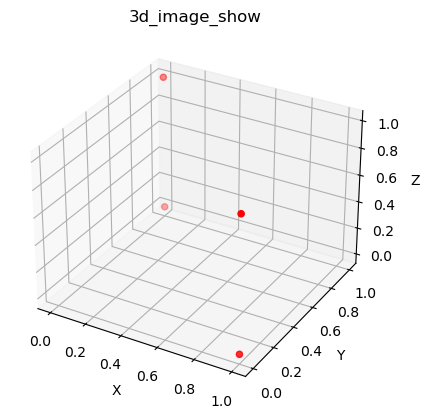

In [217]:
scatter3D(X)

[[1. 1. 0. 0.]
 [0. 0. 1. 1.]]


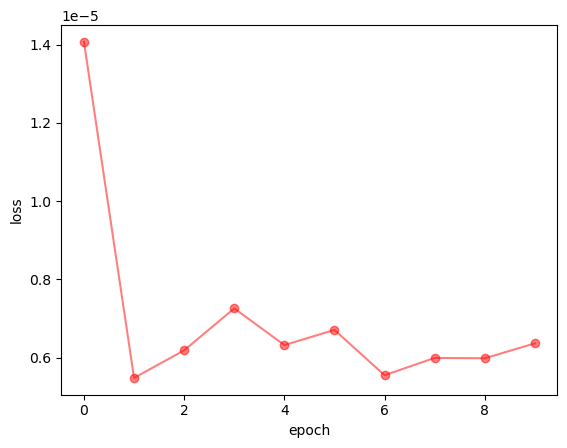

In [216]:
if __name__ == '__main__':
    X = np.array([[1,0,1],[1,0,0],[0,1,0],[0,1,1]])
    #scatter3D(X)
    W = np.random.random(size=(2,3))
    loss_lst = []
    epoch = 10000
    for i in range(epoch):
        #归一化
        W_N = normalize(W)
        #随机选取
        X_C = random_choice(X)
        #计算
        h = cal_h(np.dot(W_N, X_C.T))
        W,loss = update(W,X_C,h)
        if i % 1000 == 0:
            loss_lst.append(loss)
        
    ans = cal_h(np.dot(W_N, X.T))
    print(ans)
    plt.plot(loss_lst,linestyle = "-",marker="o",color='r', alpha = 0.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [219]:
print(X.T)

[[1 1 0 0]
 [0 0 1 1]
 [1 0 0 1]]
